<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/Lez8e9_3103e01042021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vediamo come mettiamo un file da colab a GitHub**

Prima di fare "ok" nella casella che compare facendo "file-->salva su github", se cambiamo il nome e scriviamo il percorso dove mettere il file, lo inserisce in quella cartella. E se la cartella non esiste, la crea.

Abbiamo parlato di 2 categorie di ML:

- **SUPERVISE LEARNING**: PRETEND THAT FOR SOME OF THE DATA I DONT KNOW THE RESULT AND PREDICT THE RESULT. I HAVE A GROUND TRUTH AND 
I AM ABLE TO COMPARE MY RESULTH WITH GROUND TRUTH, ABLE TO DETERMINE THE ACCURACY FOR EXAMPLE. I ABLE TO TUNE HYPERPARAMETERS.

There exist the **hyperparaeters**: they are parameters those are the choice that I made for the model that are not optimize by the data. This is an entire domain problem. I have to decide this hyperparmeters. I can verify how the model works, calculating the accuracy. 

**All this things are only for supervise.** 

Now we repeat unsupervise:

- **UNSUPERVISE LEARINNG**: FIND A STRUCTURE IN THE DATA BASED ON ALL OF THE FEATURES OF THE DATA, AND I HAVE NOT A GROUND TRUTH. THIS IS MUCH MORE SPECULATIVE AND HERUSTIC THAN SUPERVISE LEARNING.



In supervise learning there is the train, test and validation for my model.
**Read chapter 7 from the book "elements of stathistical learning"**, about model selection and model validation, and also for model assessment and selection.

We talked about linear regressiona as entry level model of ML. And we talked about the fact that there are basically 3 step:

1. I don't have to choose that I am gonna solve my problem modeling the data. E.g. if I was clustering I am not modeling the data, also in NHRT, also in KS-test I am not to fit a gaussian distributin. I am measuring onyl some quantities.
So as first step I am gonoe choose if the data are suite a modeling aproach.

2. Choose an appropiate familiy of models to through out my data, e.g. the line.

3. Find what are the parameters of the line that are appropriate to represent my data. Remembering the definition of model of ML based on dimesion of dataset, I am choosing the right paramter to get the right representation of my data in a lower dimensional representation of datasets.

4. ...


**Quando facciamo linear regression, my x and y have uncertainties, so I have to include the uncertainties to make the right assesment.**

What we do insted of resolving the analytical solutoin, is define the objective function to find the best model for the data, optimize it. Most of ML rely on this concept of minimizing the objective function. 

**The objective function** is something that has to include my prediction of the model and  what the data actually is. Must include what my model predicts and what my data is. And it has to describe a sort of distance between the data and model prediction. **THE GOAL IS MINIMIZING THIS DISTANCE**. The higher the power of the distance between one data point and the predicition is, the more the outliers will "prevail" (will count more). $\rightarrow$ See difference between $L_1$ and $L_2$.
If I have a lot of scatter in my data and I am not worried about the outliers, I can choose $L_2$.

**Neither $L_1$ and $L_2$ contains the error, so I can use $\chi^2$ to include error in my model. This is the weighting factor for my data.**

##**EXERCISE ON GAMMA RAY BURST**

Notebook: https://github.com/fedhere/MLPNS2021/blob/main/HW3_LinearRegression/FitLineToGRBAfterGlow.ipynb

Notebook con soluzioni: https://github.com/fedhere/MLPNS2021/blob/main/HW3_LinearRegression/FitLineToGRBAfterGlow_mcmc.ipynb

- read the data form google drive. Mount drive, read the data and
manipulate them.
- FIT THE DATA with $L_1$, $L_2$, $\chi^2$ using our code for $L_1$ and $\chi^2$ and use the prepared code for $L_2$. Then repeat with the sklearn functions.

**MAGNITUDE is the unit which measure the brightness of the stars. This is a logarithmic scale!** The scale of magnitude is inverse, so smaller magnitude corresponds to brighter objects and vieceversa. This is becasue the brghtness of a gamma ray burst will fade as the time goes by. 

I can fit the dacay of a GRB with a line, but actually it is a broken power law. 

In interest of time the goal now is to code one of $L$ distance and $\chi^2$, and then use linear regression from sklearn.

In [1]:
from google.colab import drive
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive/MLPNS/

/content/drive/MyDrive/MLPNS


In [4]:
data = pd.read_csv('grb050525A.csv')

In [5]:
data

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


Per fittare creiamo la logtime variable, prendendo il log10 dei valori del tempo, e la inderisco in una nuova colonna del dataframe.


In [6]:
data["logtime"] = np.log10(data.time)

In [7]:
data

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098
...,...,...,...,...,...,...
114,W1,63738,NaN,21.20,1,4.804398
115,M2,74798,NaN,21.59,1,4.873890
116,U,128928,NaN,20.05,1,5.110347
117,V,971360,NaN,22.09,1,5.987380


In [8]:
#data["logtime"] = np.log10(data["time"])

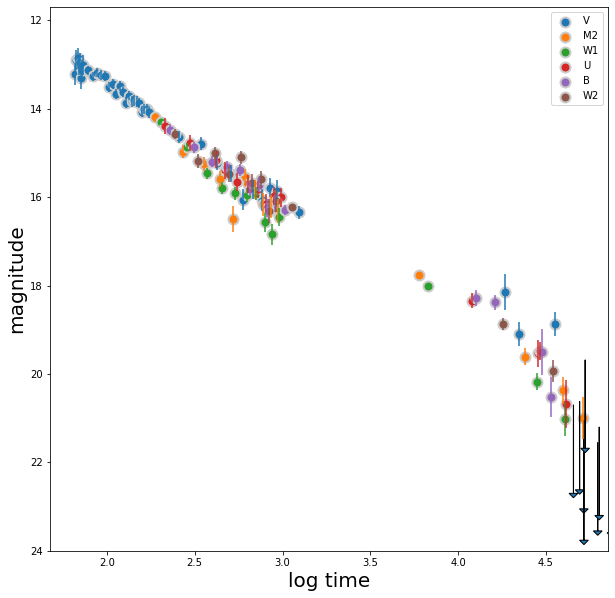

In [9]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties

for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')
    

# plot the upperlimits as arrows
nuplim = data.mag.isna().sum()
for i in data[data.upperlimit == 1].index:
    pl.arrow(data.loc[i].logtime, 
             data.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)          
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure 1: Photometry of the Afterglow of GRB 052505A. All photometry is from the Swift satellite and it is obtained from Table 3 of Blustin et al. 2005 https://arxiv.org/pdf/astro-ph/0507515.pdf. The photometric band for each datapoint is indicated in the legend. Time is relative from the estimated moment of explosion of the stellar progenitor. Upperlimits are indicated by down-pointing arrows.



N.B. le barre verticali in basso sono gli upeprlimit. Che normalmente non vengono utilizzati perchè sarebbe difficile trattarli.

###ADESSO BISOGNA PROCEDERE CON IL FIT.

In [10]:
x = data[data.upperlimit == 0].logtime.values
X = np.c_[np.ones((len(data) - data.upperlimit.sum(), 1)),
          x]

y = data.loc[data.upperlimit == 0].mag.values
print("shape of the input array X", X.shape)
print("shape of the input array y", y.shape)
#note the shape in python is flipped compared to the shape in linear algebra

shape of the input array X (108, 2)
shape of the input array y (108,)


###Adesso risolviamo invece la **normal equation**

La X della normal equation ha una colonna di 1 perchè la soluzione è per froza bidimensionale con questo modello. Infatti se guardiamo la normal equation, 
l'incognita x si becca il coefficiente **a**, mentre l'intercetta **b** non moltiplica niente, quindi abbiamo un 1.

In [11]:
#X

In [12]:
#DI SEGUITO IL FIT DELLA PROF:

#e fitto usando linalg:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print ("best fit parameters from the linlag(): " + 
      "intercept {:.2f}, slope {:.2f}".format(theta_best[0], theta_best[1]))

#per fittare ci basta fare linalg.inv perchè ci risolve il prodotto tra le 
#matrici, ovvero ci trova il vettore colonna (a b) che abbiamo nelle slide.

#UN ALTRO MODO DI FARE QUESTO PRINT È USARE L'ASTERISCO. VEDI QUI SOTTO:
print ("best fit parameters from the linlag(): " + 
      "intercept {:.2f}, slope {:.2f}".format(*theta_best))

#anzichè usare linalg, devo creare io il codice implementando la normal
#equation

best fit parameters from the linlag(): intercept 8.58, slope 2.51
best fit parameters from the linlag(): intercept 8.58, slope 2.51


In [13]:
from scipy.optimize import minimize

def line(intercept, slope, x):
    return slope * x + intercept
	
def l2(args, x, y):
    '''l2 target function: returns value of l2 for given arguments and data for a line model
    arg: (array) model arguments (parameters)
    x: the exogenous variable (array)
    y: the exogenous variable (array)
    returns L2 sum of difference between prediction and data squared
    '''
    a, b = args
    return sum((y - line(a, b, x))**2)


initialGuess = (10, 1)

l2Solution = minimize(l2, initialGuess, args=(x, y))
print(l2Solution)
print("")
print("best fit parameters from the minimization of L2: " + 
       "intercept {:.2f}, slope {:.2f}".format(*l2Solution.x))

      fun: 12.82598750072551
 hess_inv: array([[ 0.06254438, -0.02029726],
       [-0.02029726,  0.00711354]])
      jac: array([-2.38418579e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([8.58266842, 2.51199977])

best fit parameters from the minimization of L2: intercept 8.58, slope 2.51


In [14]:
l2Solution.x

array([8.58266842, 2.51199977])

###Adesso facciamo lo stesso fit usando $\chi^2$

In [15]:
def chi2(args, x, y, s):
    a, b = args
    return sum((y - line(a, b, x))**2 / s**2)

x = data[data.upperlimit == 0].logtime.values
y = data.loc[data.upperlimit == 0].mag.values
s = data.loc[data.upperlimit == 0].magerr.values

initialGuess = (10, 1)

chi2Solution = minimize(chi2, initialGuess, args=(x, y, s))
print(chi2Solution)
print("")
print("best fit parameters from the minimization of the chi squared: " + 
       "intercept {:.2f}, slope {:.2f}".format(*chi2Solution.x))

      fun: 317.4206698013084
 hess_inv: array([[ 4.23050895e-04, -1.33046572e-04],
       [-1.33046572e-04,  5.38581176e-05]])
      jac: array([0.00000000e+00, 1.90734863e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 258
      nit: 5
     njev: 62
   status: 2
  success: False
        x: array([8.59948748, 2.48019102])

best fit parameters from the minimization of the chi squared: intercept 8.60, slope 2.48


###Adesso facciamo il fit **usando sklearn**

In [16]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, y)
print ("best fit parameters from the sklearn LinearRegression(): " + 
       "intercept {:.2f}, slope {:.2f}".format(lr.intercept_, lr.coef_[1]))

best fit parameters from the sklearn LinearRegression(): intercept 8.58, slope 2.51


In [17]:
#when we use the chisq we are minimizing the likelihood of the function.

Gli **UPPERLIMIT** non sono utilizzati dal punto di vista statistico. Gli upperlimit provengono dall'apparato di misura e noi li rimuoviamo perchè utilizzarli sarebbe molto difficile. 



##DOCKSTRING

Quando scriviamo una funzione possiamo/dobbiamo inserire una dockstring che spieghi cosa fa la funzione, quali sono gli input e cosa ritorna. Per creare la dockstring, nella funzione inseriamo:

'''

QUI TUTTE LE SPIEGAZIONI

'''

Infatti quando facciamo "funzione?" quello che facciamo è invocare la dockstring scritta dall'autore della funzione.

##PLOT DI TUTTE LE SOLUZIONI

Create a function that uses the parameters you input and plots a line. Add a legend that describes which line corresponds to what.

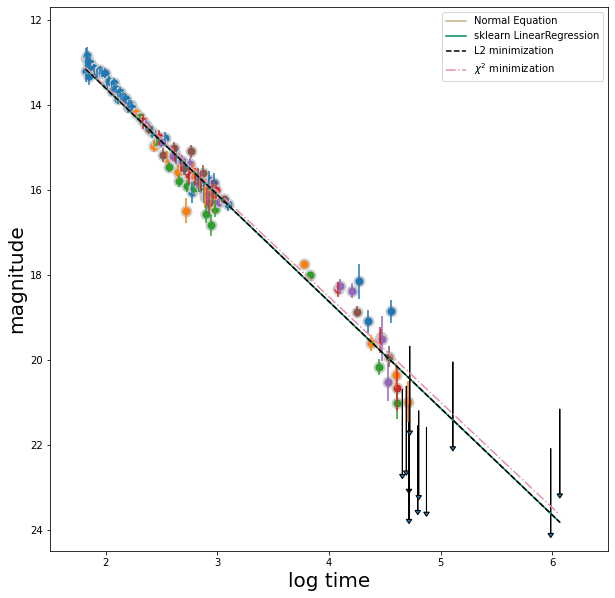

In [18]:
def plotline(pars, x, color='k', symbol='-', label='model', 
             alpha=1, ax=ax):
    slope, intercept = pars
    y = line(intercept, slope, x)
    ax.plot(x, y, ls=symbol, c=color, label=label, alpha=alpha)


ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)
    

# plot the upperlimits as arrows
nuplim = data.mag.isna().sum()
for i in data[data.upperlimit == 1].index:
    pl.arrow(data.loc[i].logtime, 
             data.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')
    
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.coef_[1], lr.intercept_), data.logtime.values, 
         color='#'+colors[0], 
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best[::-1]), data.logtime,  
         color='#'+colors[2], symbol='-',
         label="sklearn LinearRegression", ax=ax)
#minimize L1
#plotline((l1Solution.x[::-1]), data.logtime,  
#         symbol=':',
#         label="L1 minimization", ax=ax)
#minimize L2
plotline((l2Solution.x[::-1]), data.logtime,  
         symbol='--',
         label="L2 minimization", ax=ax)
#minimize chi2
plotline((chi2Solution.x[::-1]), data.logtime, 
         color='#'+colors[3], symbol='-.',
         label=r"$\chi^2$ minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

|method 	                  |slope |	intercept|
| ------------- |:-------------:| -----:|
|Normal Equation 	          | 2.51 |  8.58     |
|sklearn.LinearRegression() | 2.51 |	8.58     |
|minimize L2 	              | 2.51 |	8.58     |
|minimize chi2 	            | 2.50 |	8.58     |

Figure 2: Same as Figure 1, but with linear regression models plotted. The models correspond to the best fit line to the data (excluding upper limits) calculated analytically by solving the normal equation, by solving the fit analysitcally with sklearn.LinearRegression(), and by minimizing the objective functions L1 and Chi squared. The models are indicated in the legend. Scrivere anche che sono in log-log scale. 


Nella caption avremmo dovuto anche scrivere che la $L_2$ ha una slope maggiore della $L_1$ perchè nella L2 diamo più importanza agli errori. I dati che hanno una luminosità minore hanno più incertezza perchè è più difficile la misura dallo sturmento. Quando inserisco gli errori quindi la slope del $\chi^2$ diminuisce perchè ho dato meno importanza ai punti che sono meno luminosi.



Colons can be used to align columns.

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

There must be at least 3 dashes separating each header cell.
The outer pipes (|) are optional, and you don't need to make the 
raw Markdown line up prettily. You can also use inline Markdown.

Markdown | Less | Pretty
--- | --- | ---
*Still* | `renders` | **nicely**
1 | 2 | 3

##INIZIAMO A PARLARE DEI MONTECARLO METHODS

**Stiamo parlando di OTTIMIZZAZIONE/MINIMIZZAZIONE**: stiamo ottimizzando L1 ed L2 e stiamo settando una target function (che può anche essere il $\chi^2$) e staimo cercando di ottmizzarla. Stiamo cercando i migliori parametri che mi ottimizzano la target function. 

###**What we did, especially in $\chi^2$, is MAXIMIZING the likelihood, changing the parameters of the function.**

Theroretically we are searching the minimum, but exerimentally this is very difficult. 

Minimizing the $\chi^2$, we are maximizing the probability of the data given a model: P(Data|$\theta$)

####**When we use the $\chi^2$, we are definig also the LIKELIHOOD of the model, i.e. the probability of the model given the data**.

The model is the same, but change what I know: data or model.

Maximizing the likelihood we seek the parameters that maximize the probability of the observed data under the chosen model.



IF I KNOW THE PROCESS, AND IF I KNOW HOW UNCERTANTIES ARE GENERATED, THAT MEANS THAT I CAN KNOW THE PROBAB OF GETTING A GIVEN VALUE FOR MODEL PARAMETERS. 
THE SAME WE DID WITH 1D DISTRUBTION (IN THE PAST), BUT NOW SIGMA AND MU CHANGE FOLLOWING THE EXOGENOUS VARIABLE. 

For every point in time I believe that there is a generative process that produces data at that point, following some known distribution, i.e. I know sigma and mu and depend on the point on axis. So I have a probability of what number I shold get for my data. 

###**THE LIKELIHOOD** 
is the opposite: i.e. in this case I know the data, and I am trying to find the probability of sigma and mu (i.e. the model) given the data. 

But the model is the same as defined for $\chi^2$.

In the exercise we did optimization, so we were trying to find mu and sigma, believing that my generative process were a line. 
And the probability will be maximum when the model is right, because the probab is maximum with that mu and sigma. 


**Vedendo la forma della likelihhod, la funzione cresce al diminuire dell'argomento dell'exp. Allora, siccome l'esponente è il $\chi^2$, quando la likelihood raggiunge il massimo, $\chi^2$ raggiunge il minimo.**

$\rightarrow$ Minimizing the $\chi^2$, means maximize the likelihood. 

###**GRADIENT DESCENT**

Take large step if derivative is large, and small step if derivative is small, to have computational efficience.

Sudo code (GRADIENT DESCENT algorithm)


1. Choose a target function Q(p) of the parameters p (for example $L_1$)
     
2. Choose a (random) initial value for the parameters: (e.g. p0 = (a0, b0))
     
3. Choose a learning rate η (this could be a multidimensional vector ηi setting a different learning rate for different features)

   **Repeat steps 4, 5, 6 until "convergence":**
     
4. Calculate the gradient Q' of the target function for the current parameter values calculating it over all observations in the training set
     
5. Calculate the next step sizes for each feature: **stepsize = Q'(p_now) * η**
     
6. Calculate the new parameters p_new as : p_new = p_now - stepsize


The problem that I may have a function with more minimum, with local minimum. **To avoid to get stuck in local minimum I add some stochasticity: "I am gonna take this step, even if the gradient is negative, with some probability".**

**So I add the best size: what subset of data I am using to calculate gradint descent, i.e. in stochastic gradient descent I add at point 4 the fact that I calculate the graident bla bla bla ON A SUBSETS OF THE OBSERVATIONS.**

So the difference when I add stochasticity is that I am taking the step even if the gradient is negative, and also that I calculate gradient in a subset of data, to get multiple solution. 

Since I am using such a subset, I can run the code in parallel and start from a different point, to improve cmoputational efficiency. 

# **LEZIONE 9 01042021**

Finiamo di parlare dei montecarlo methods e linear regression con montecarlo methods. Poi faremo **model selection**.

Deep learning model are aggregate of linear regression model, essentially this is but **this is not the right definition**. 

When I minimize the $\chi^2$ I am looking at probab of parameters given the data.

And if I think the bayes theorem I am looking at the probaility of a model given the data.

If I have a line, this parameters makes a surfaces. My laikelihoos is the 2D plane and the value of the likelihood is the height of this landscape at a given point. So I am looking the minimum of this surface, sampling the surface. (Actually, computtionally I am minimizing the $\chi^2$ because minimizing is simpler than maximize.) 

What I am gonna do is taking a random start and follow the downhill of surface until I hit the minimum. This is good but, if I have local minimum I can be stucked in one of them.  So I will take the step even if the the gradient is negative, as we saw yesterday. 



##MONTECARLO METHODS

##USING ALL THIS TO SOLVE ALL MY PROBLEMS ABOUT DOWNHILL OPTIMIZATION AND MODEL FITTING

We are going to fit the grb data suing MCMC and fit a broken power law to the data.

**###MODEL OPTIMIZAION WITH MCMC**

For example this method can be used to make prediciton on hospitalization rate. (MCMC is known also as agent based model).

Not only MCMC it gives me the best fit to the data, but it also gives uncertanties at any point of the model. I can also have uncertainties of the past, of the fit because every parameter of the model is fitted with uncertanties. 

MonteCarlo: stochastic process

Markov: markovian process

Chain: sequencies of stochastic drows.

###**THE GOAL OF MCMC IS TO SAMPLE A POSTERIOR DISTIRIBUTION**, not to **find** the max of posterior! 

The posterior is the probab of the model given thedata, in the bayesian framework, where the porbability of the model given the data times the probab of the data is equal to the probab of the data given the model time the porbab of the model (prior).

**From Wikipedia:"The posterior probability distribution is the probability distribution of an unknown quantity (parameter of the model), treated as a random variable, conditional on the evidence (the data) obtained from an experiment or survey."**

When I do gradient descent in MCMC, what I do different is that I am goona give myself the freedom to make a step in a dab direction. What is the P(Data|$\theta$)  in the current position? I am going into the new position and calculate this probabilty in the new position. If the probability has incresed, I am gonna go there. **BUT** I am not gonna go there for sure, I am gonna go there based on a rando drow. I drow random between 0 and 1, if the number is larger than a random number r, I go there. Else I am not oging there. 

**This allows me to explore the entire surface but spending more time in place that I am interested in. With this mathod I am less lucly to go in a place that has a lower probability. I will spend more time in place that have high probability.**

The fact that I go in the new place based on a random drow and see if the neumber I get is larger or smaller than a random threshold, amke the process markovian and ergodic. 

A markovian porcess is a process that retain memory only on the previous step. And the sysyem has no memory on the earlier state.
**Ergodic**: if I give enough(=infinte) I am gonna to explore all the space. In additoin **detailed balance** is a sufficient condition to ergodicity. 

So if the process is markovian ergodic I am guaranteed to explore the entire likelihood surface given infintie time.

###**ON THE LIKELIHOOD SURFACE:**
**The problem of fitting models to data reduces to finding the maximum likelihood of the data given the model. This is effectively done by finding the minimum of the  "-log(likelihood)"**

#Now try to fit the data with broken power law. 

**We will use MCMC package "emcee"**. 



####This is a package that can be pip installed, because it doesn't come from the standard colab package.

In [19]:
!pip install emcee  

In [20]:
import emcee

In [21]:
emcee

<module 'emcee' from '/usr/local/lib/python3.7/dist-packages/emcee/__init__.py'>

look at documentation: https://emcee.readthedocs.io/en/stable/

In [22]:
#line?

Riprendiamo adesso il notebook di ieri con il fit dei dati sulla GRB. 

###**I just worte bayes therom for my specific data and model.**

####Since I am doing MCMC so I am trying to find the postirior based on the prior and the likelihood, not the evidence. **SO I HAVE TO DEFINE THE PRIOR AND LIKELIHOOD, AND I DEFINE IT IN THE LOG SPACE, BEACUSE IS COMPUTATIONALLY EASIER. IN FACT IF I HAVE A GAUSSIAN LIKELIHOOD I AM INTERSTED ONLY IN THE EXPONENT**. 


The prior is the peice where I can say what I know about physics, so now I am gonna say that the intercept and slope have to be postive, becasue is a process from energy diffusion in an explosion. 

###the prior should come frome knowledge that has nothing to do with data

In [23]:
def log_prior(theta): 
  slope, intercept = theta #this two are my parameter
  if slope >= 0 and intercept >= 0:  #physics I know. I wanna return the maximum likelihood
  #so I need to say that if this condition si violeted make it better as possible, and return -inf
  #otherwise return something because I don't want my prior to be informative
    return 0    #true condition
  return -np.inf #violeted condition

def log_likelihood(intercept, a, x, y, yerr):
  #assume a gaussian distirbution of uncertanties
  #remember a model is a line
  #the likelihood is a chi squared
  return -np.sum(((y - line(intercept, slope, x))** 2) /yerr **2)

In [24]:
def log_likelihood(theta, x, y, yerr): #likelihhod is P(model|data)
  slope, intercept = theta
  #assume gauassian distirbution of uncertanties and assume that my model is a line
  return -np.sum(((y - line(intercept, slope, x))**2) / yerr**2)
  # "y-line(..)" in the return means "data-model"

**I wanna calculate the posterior: product of likelihood and the priori. Since I am in log space the posterior is log_prior + log_likelihhod**

In [25]:
def log_probability(theta, x, y, yerr):
  lp = log_prior(theta)
  if not np.isfinite(lp):
    return -np.inf
  
  return lp + log_likelihood(theta, x, y, yerr)

Now I am gonna do the emcee infrastructure. 

The idea of emcee is to have a bunch of mcmc that proceeds in paralle, and they proceed indipendently startin from different positoins. 

I want an initial guess, then set my 


In [26]:
ig = [1,10]

Initialize all walkers

In [27]:
#np.random.seed(648)
nwalkers = 32
ndim = len(ig)

#initial position
pos = np.array(ig) + 1e-4 * np.random.randn(nwalkers, ndim) #I wanna start with 32 walkers


In [28]:
pos.shape

(32, 2)

abbiamo creato 32 posizioni (x,y) iniziali per i 32 walkers.

**Now I am going to start the sampling!**

In [29]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, s))

Sampler has a lot of methods and attribute!

Next I am gonna fire off the mcmc.

In [30]:
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:06<00:00, 754.49it/s]


###Which location my walker visited?

I have more probabilty to visit loctoin that has high likelihood by desing, and I am moving to the direction with the low likelihood, moving stocahstically with low probabilty in place with lower likelihood.

I wanna see how ofter my walker have been in each place. And so this place are my place wiht high likelihood. We started bayesian and finished frequentist (the more they stay there the more probility I have.



In [31]:
samples = sampler.get_chain()
#samples

In [32]:
samples.shape

(5000, 32, 2)

What this chain tells me? It tells me what the probability is. 

##The most frequented place in this chain?

If I wanna know the location taht is most frequnted place for this chain I can take the mean or the median of all of the chains. The median is the right value for this purpose. 

I am gonna take the median of the chain cause I am treating the chain as it were exploring the surface indipendently. So firt I am gonna flatten the chains, this is gonna tells me what position were encountered al least once by my walkers. Assuming that they are independent.

So first I have to flatten the chain and build one chain 32*5000 long, tht tells me the position encountered once. 

In [33]:
#flat_samples = samples.reshape(5000*32, 2)

In [34]:
#flat_samples.shape

Reshaping the chain with the function of the package, so I can concatenate them:

In [35]:
#samples = sampler.get_chain(flat=True)

In [36]:
#samples.shape

In [37]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

In [38]:
flat_samples.shape

(10432, 2)

This is the same as before.

Now I can get the location with the median, also with uncertanties as quartiles, std or variance. **I can use quartile as uncertainties for the most common place which is determined by the median.**

In [39]:
#I am taking the percentile for each of the dimenison
mcmc= np.zeros((ndim, 3))
               
for i in range(ndim):
  mcmc[i] = np.percentile(flat_samples[:,i], [16, 50, 84])
  #ho scelto 16,50,84 perchè considero una forma gaussiana e anzichè fare il 25%
  #a sx e dx del 50%, ho fatto in base ad 1 dev std
mcmc

array([[2.4665168 , 2.48039142, 2.49450295],
       [8.5602701 , 8.59857144, 8.63780128]])

It tells me that the best positon is the second element of the first and second row. x=2.4805987 ad y= 8.59827767

To make the plot I install corner

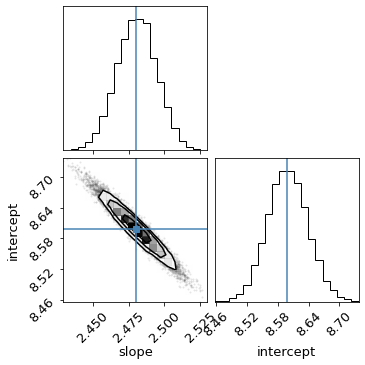

In [40]:
!pip install corner
import corner
pl.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["slope", "intercept"], truths=mcmc[:,1]);

Since we get a figure for marginalize distributoin that is oval, this means that the parameters are covariant. If they were not covariant I will see a circle. 

In general we can have complicate shapes.

**I can plot the chain and visualize it! Very usefull.**

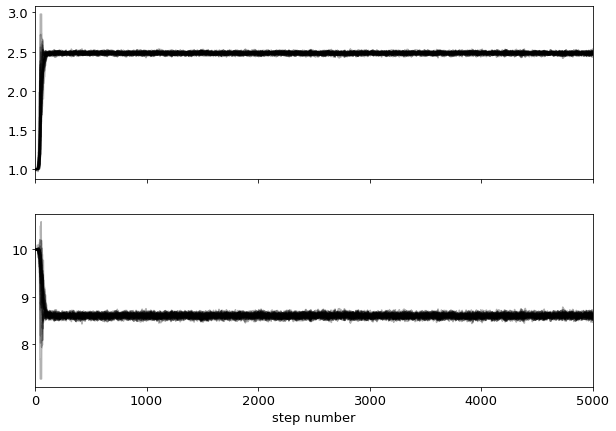

In [41]:
fig, axes = pl.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

Vediamo cosa succede nei primi 100 step per capire meglio quanti step possiamo tagliare all'inizio della chain.

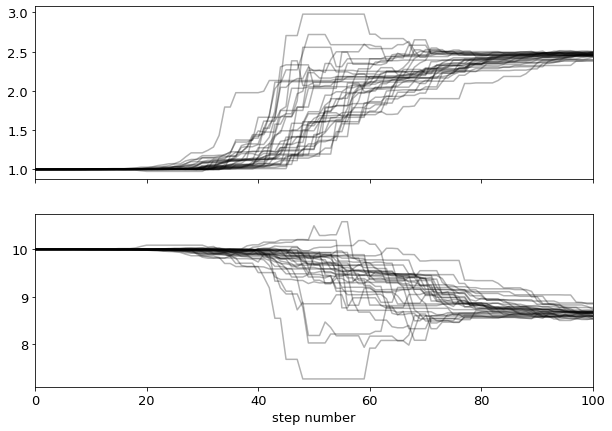

In [42]:
fig, axes = pl.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, 100)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

note: when I wrote the function I mixed x and t: you have t on both fractions

b - np.log10(((x/Tb)** -a1 + (x/Tb)**-a2))

#TRY FITTING GRB WITH A BROKEN POWER LAW

since in log log space it is not a line. Te broken power law is of the form

$b - log_ {10}((\frac{t}{T_b})^{-a1} + (\frac{t}{T_b})^{-a2})$

where a1 and a2 are different numbers, and b is a constant. **And t is the real time in sec, not in logtime.** 

**My parameters of my model are a1, a2, b and tb.**

Now the procedure is the same. I have the likelihood and I have to change the model still assuming uncertanties are gaussian. 

We have also to rewrite the log prior and log_likelihood and I can reuse other infrastructure.

La mia borken power law è una funzione del tempo, allora quando definisco la funzione inserisco nei parametri tutto il resto, ovvero i parametri sono a1,a2,b,Tb. 

Siccome il tempo non è in log, mi riprendo i dati dal dataframe.

In [43]:
x_nolog = data[data.upperlimit == 0].time.values
y = data.loc[data.upperlimit == 0].mag.values

In [44]:
def bpl (theta, x):
    a1, a2, Tb, b = theta
    return b - np.log10((x/Tb)**(-a1) + (x/Tb)**(-a2))

def log_likelihood_bpl(theta, x, y, yerr):
    return -np.sum(((y - bpl(theta, x))**2) / yerr**2)

def log_prior_bpl(theta):
    a1, a2, Tb, b = theta
    if a1 > 0 and a2 > 0 and b > 0 and  x_nolog.min() < Tb <  x_nolog.max():
        return 0.0
    return -np.inf

def log_probability_bpl(theta, x, y, yerr):
  lp = log_prior_bpl(theta)
  if not np.isfinite(lp):
    return -np.inf 
  
  return lp + log_likelihood_bpl(theta, x, y, yerr)

Devo trovare quali sono i parametri initial guess che devo passare. E li trovo come fatto sotto:

for the initial guess: try :
[a1, a2, Tb, b] = [2,   3 , 500,  15]

(ho ottenuto questi numeri facendo una preliminare stocfhastic gradient descent optimization with scipy.optimize.minimize() which is a common practice)

In [45]:
y

array([13.21      , 12.9       , 12.86      , 13.01      , 12.97      ,
       13.31      , 13.13      , 13.01      , 13.13      , 13.26      ,
       13.18      , 13.24      , 13.25      , 13.51      , 13.44      ,
       13.67      , 13.48      , 13.62      , 13.86      , 13.7       ,
       13.83      , 13.81      , 13.84      , 13.87      , 14.06      ,
       14.        , 14.01      , 14.08      , 14.18903433, 14.29714678,
       14.38453778, 14.47292871, 14.56755795, 14.64      , 14.96903433,
       14.86714678, 14.76453778, 14.87292871, 15.17755795, 14.79      ,
       15.24903433, 15.45714678, 15.19292871, 15.00755795, 15.15453778,
       15.22      , 15.58903433, 15.78714678, 15.39453778, 15.31292871,
       15.47755795, 15.47      , 16.48903433, 15.90714678, 15.65453778,
       15.38292871, 15.09755795, 16.06      , 15.54903433, 15.94714678,
       15.69453778, 15.81292871, 15.67755795, 15.83      , 15.82903433,
       15.90714678, 15.82453778, 15.71292871, 15.59755795, 16.06

In [46]:
nll = lambda *args: -log_likelihood_bpl(*args)
ig = [0.2, 5, 1000, 20]

soln = minimize(nll, ig, args=(x_nolog, y, s))
soln

      fun: 217.4653148061869
 hess_inv: array([[ 0.01338726, -0.00258176, -0.02678465,  0.00175664],
       [-0.00258176,  0.00070347,  0.0048172 , -0.00041109],
       [-0.02678465,  0.0048172 ,  0.05433035, -0.00342656],
       [ 0.00175664, -0.00041109, -0.00342656,  0.00034364]])
      jac: array([5.53131104e-05, 4.00543213e-05, 1.90734863e-05, 1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1098
      nit: 69
     njev: 181
   status: 2
  success: False
        x: array([  3.54790516,   2.1456743 , 273.61857641,  15.04731019])

Allora memorizzo i guess iniziali:

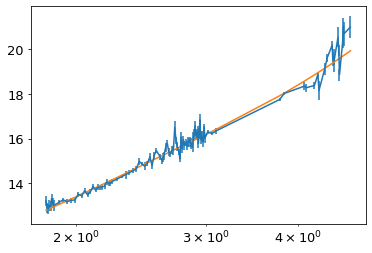

In [47]:
ig = soln.x

pl.errorbar(x, y, yerr=s)
pl.plot(x, bpl(ig, x_nolog))
pos = np.array(ig) + 1e-4 * np.random.randn(32, len(ig))
nwalkers, ndim = pos.shape
labels = ["intercept","slope"]
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability_bpl, args=(x, y, s))
pl.xscale("log")

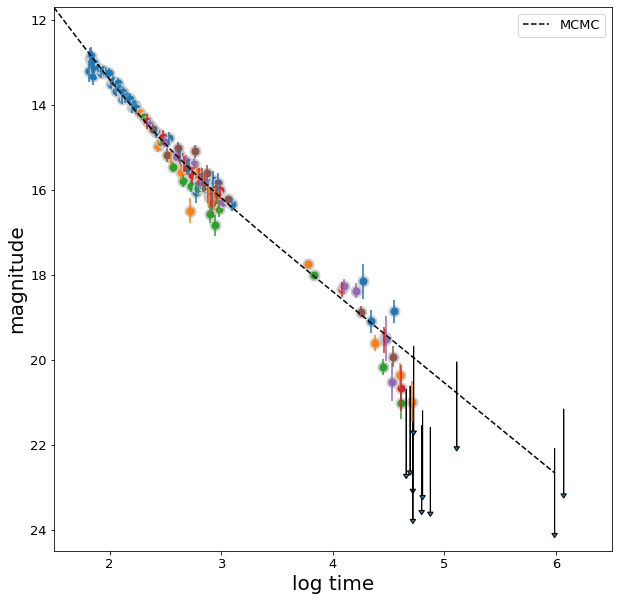

In [48]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)
    

# plot the upperlimits as arrows
nuplim = data.mag.isna().sum()
for i in data[data.upperlimit == 1].index:
    pl.arrow(data.loc[i].logtime, 
             data.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')
    
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]

#disegno il fit MCMC
ax.plot(np.arange(1.5,6,0.01), 
        bpl(ig, 10**np.arange(1.5,6,0.01)), ls="--", c="k", 
        label="MCMC")

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

In [49]:
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:13<00:00, 378.59it/s]


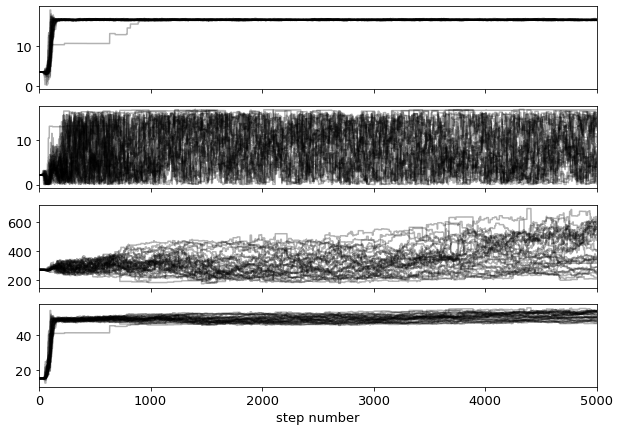

In [50]:
#mi da un errore con ndim, forse l'ho modificato prima
#quindi lo definisco nuovamente

ndim=len(ig)

fig, axes = pl.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [51]:
flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
    mcmc[i] = np.percentile(flat_samples[:, i], [16, 50, 84])
    
mcmc[:,1]

array([ 16.60841765,   8.6372471 , 323.70144177,  50.04132291])

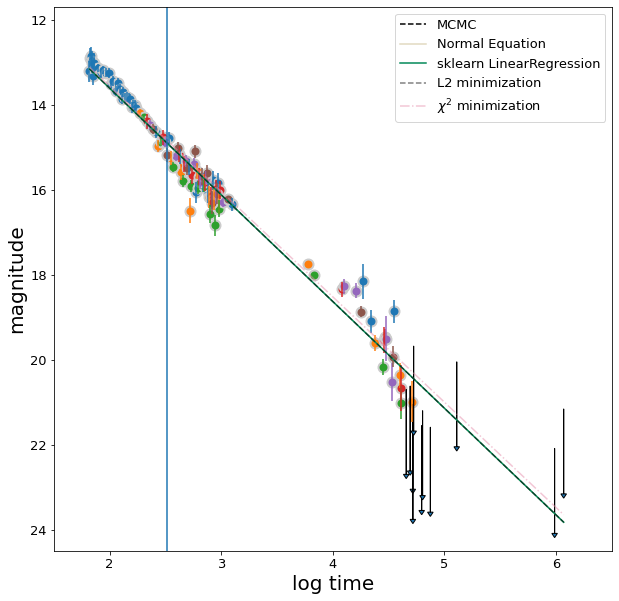

In [52]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)
    

# plot the upperlimits as arrows
nuplim = data.mag.isna().sum()
for i in data[data.upperlimit == 1].index:
    pl.arrow(data.loc[i].logtime, 
             data.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')
    
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]

ax.plot(data.logtime.values, line(mcmc[:,1][0], mcmc[:,1][1], 
                            data.logtime.values), ls="--", c="k", label="MCMC")
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.coef_[1], lr.intercept_), data.logtime.values, 
         color='#'+colors[0],  alpha=0.5,
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best[::-1]), data.logtime,  
         color='#'+colors[2], symbol='-',
         label="sklearn LinearRegression", ax=ax)
#minimize L1
#plotline((l1Solution.x[::-1]), data.logtime,  
#         symbol=':', alpha=0.5,
#         label="L1 minimization", ax=ax)
#minimize L2
plotline((l2Solution.x[::-1]), data.logtime,  
         symbol='--', alpha=0.5,
         label="L2 minimization", ax=ax)
#minimize chi2
plotline((chi2Solution.x[::-1]), data.logtime, 
         color='#'+colors[3], symbol='-.', alpha=0.5,
         label=r"$\chi^2$ minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')
pl.axvline(np.log10(mcmc[2,1]))
pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

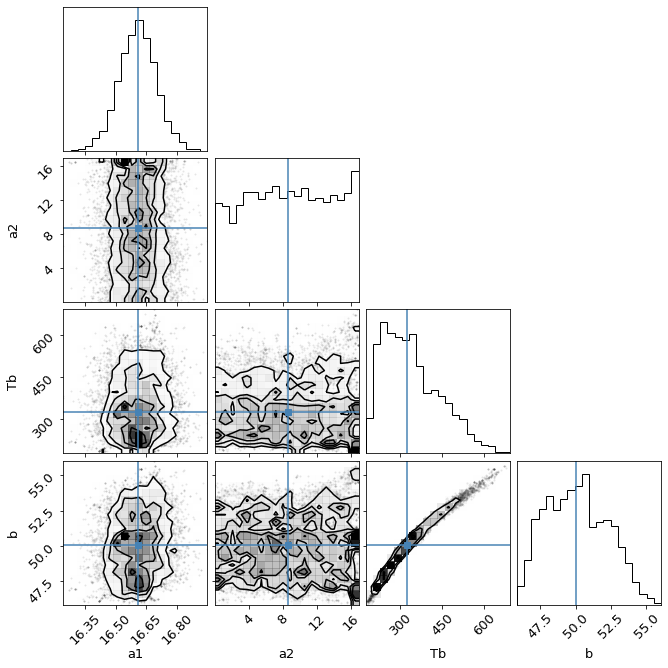

In [53]:
pl.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["a1", "a2", "Tb", "b"], truths=mcmc[:,1]);

##EXERCISE (esercizio svolto ad inizio lezione 9 ma lo metto qui altrimenti non funziona il MCMC)

**Calculate the value of pi, by a montecarlo method.**

I will calculating area of distribution, because this allows me to get the moment of distribution and then the probaility to get a number. 

I can use montecarlo method to calculate the area. 

In [54]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ndim', 'f', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [55]:
def plotsquare(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')

In [56]:
def plotcircle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')

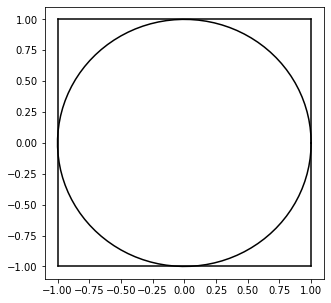

In [57]:
fig, ax = pl.subplots(figsize=(5, 5))
plotsquare(1, ax=ax)
plotcircle(1, ax=ax)

In [58]:
def isin(x, y, l):
  return np.sqrt(x**2 + y**2) < l

I do not know who to draw the position from within a circle at random. But I do know how to draw points from a **Uniform Distribution** in 2D

- Draw N point coordinates x and y between -1 and 1.
- Check if the point is within the circle.
- Calculate the fraction of points in to points out
- Optional: at every iteration plot the points in different colors if they areinside or outside the circle.

Do it for N = [10, 50, 100, 500, 1000, 10000] and see how the precision changes


3.24

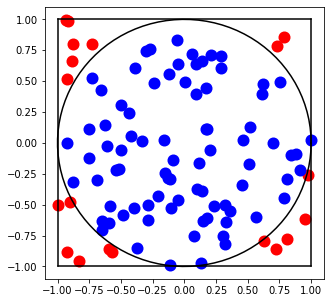

In [59]:
np.random.seed(189)
N = [10, 50, 100, 500, 1000, 10000, 100000]
pis = []
inner=0
out=0
fig, ax = pl.subplots(figsize=(5, 5))
plotsquare(1, ax=ax)
plotcircle(1, ax=ax)
  
for j in range(100):
  #np.random.rand genera numeri da una distribuz uniforme tra [0,1). Se
  #moltiplico per 2 l'intervallo sarà [0,2), e sottraggo 1 per avere [-1,1)
  x= np.random.rand() * 2 - 1
  y= np.random.rand() * 2 - 1
  if isin(x,y,1):
    inner= inner+1
    pl.scatter(x, y, alpha=1, s=100, linewidth=2, label=f, color='blue')
  else:
    out = out+1
    pl.scatter(x, y, alpha=1, s=100, linewidth=2, label=f, color='red')  
  pis = 4 * inner / 100

pis

Adesso lo facciamo per diversi N, per vedere come cambia il pi in base ad N.

In [60]:
np.random.seed(157)
N = [10, 50, 100, 500, 1000, 10000]
pis = []
inner=0
out=0

for i in N:
  inner=0
  out=0
  for j in range(i):
    x= np.random.rand()*2 -1 
    y= np.random.rand()*2 -1
    if isin(x,y,1):
      inner= inner+1
    else:
      out = out+1
  pis.append(4 * inner / i)
  
pis

[2.8, 2.8, 3.2, 2.984, 3.104, 3.164]

Plottiamo l'andamento di pi, in funzione di N.

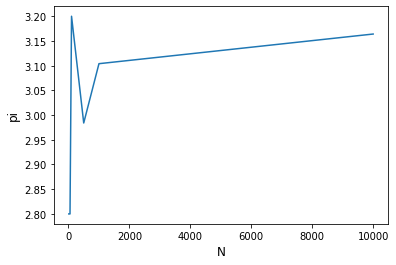

In [61]:
pl.plot(N, pis)
pl.ylabel("pi", fontsize=12)
pl.xlabel("N", fontsize=12);

####SOLUZIONE DELLA PROF


Pi:2.40


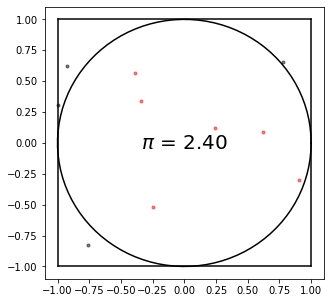

Pi:3.28


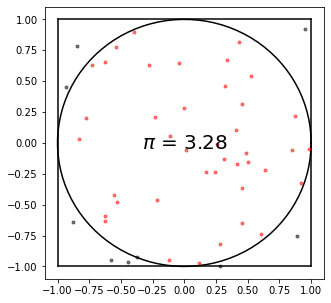

Pi:3.04


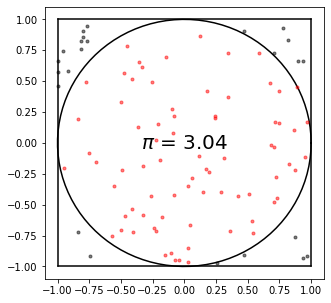

Pi:3.26


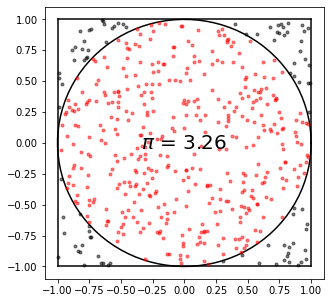

Pi:3.17


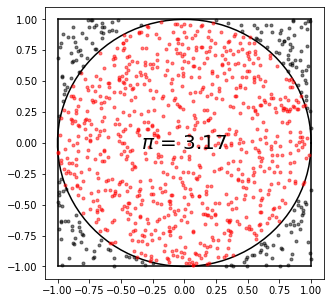

Pi:3.14


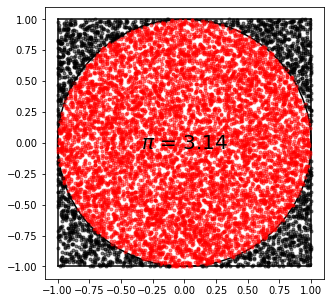

In [62]:
np.random.rand(123)
pis={}
for N in [10, 50, 100, 500, 1000, 10000]:
  fig, ax = pl.subplots(figsize=(5, 5))
  plotsquare(1,ax=ax)
  plotcircle(1,ax=ax)
  inner=0

  for i in range(N):
    x= np.random.rand()*2 -1 
    y= np.random.rand()*2 -1
    if isin(x,y,1):
      inner += 1
      color = 'r'
    else:
      color = 'k'
    ax.plot(x, y, '.', c=color, alpha=0.5)
  pis[N] = 4* inner/N
  pl.text(0, 0, r"$\pi$ = {:.2f}".format(pis[N]),
          fontsize=20, va="center", ha="center")
  
  print("Pi:{:.2f}".format(pis[N]))
  pl.show()

In [63]:
pis.keys()

dict_keys([10, 50, 100, 500, 1000, 10000])

Text(9000, 3.141592653589793, '$\\pi$')

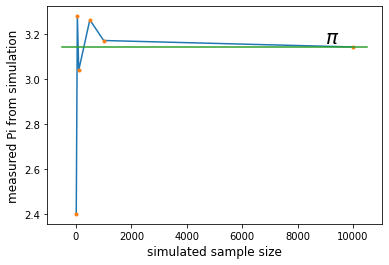

In [64]:
pl.plot(list(pis.keys()), list(pis.values()) )
pl.plot(list(pis.keys()), list(pis.values()), '.' )
pl.ylabel("measured Pi from simulation", fontsize=12)
pl.xlabel("simulated sample size", fontsize=12)
pl.plot(pl.xlim(), [np.pi]*2)

pl.text(9000, np.pi, r"$\pi$", va="bottom", fontsize=20)

**Il metodo montecarlo funziona meglio se simuliamo più numeri che pochi numeri.**

Non possiamo calcolare l'errore per questi valori. Ma possiamo calcolare l'errore come una funzione della size del sample, per la legge dei grandi numeri (proportional to sqrt(N)).